In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("creditcard.csv")  # Use the exact uploaded name


Saving creditcard.csv to creditcard.csv


# **DATA EDA**

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


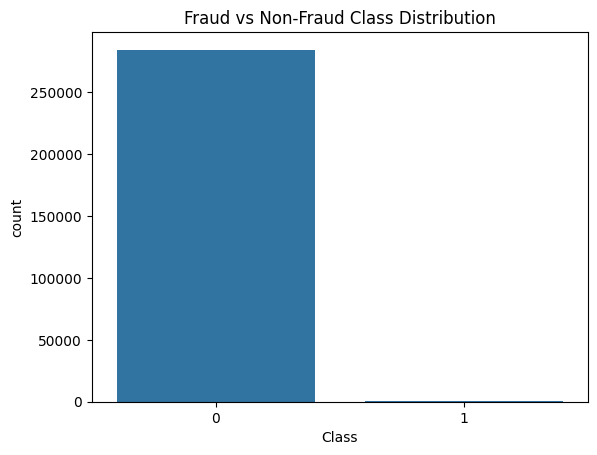

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Class Distribution")
plt.show()


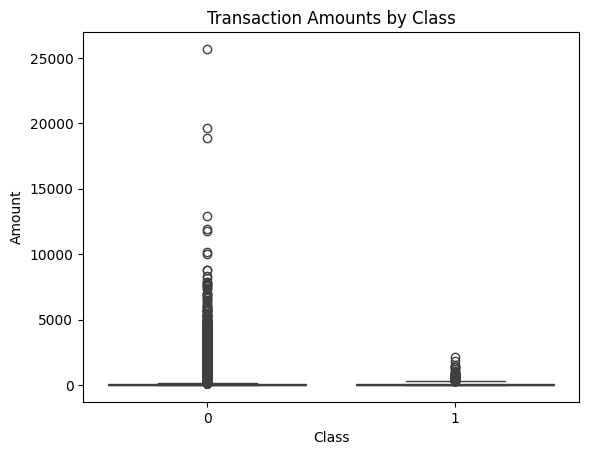

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amounts by Class")
plt.show()


**Highly Imbalanced Dataset**

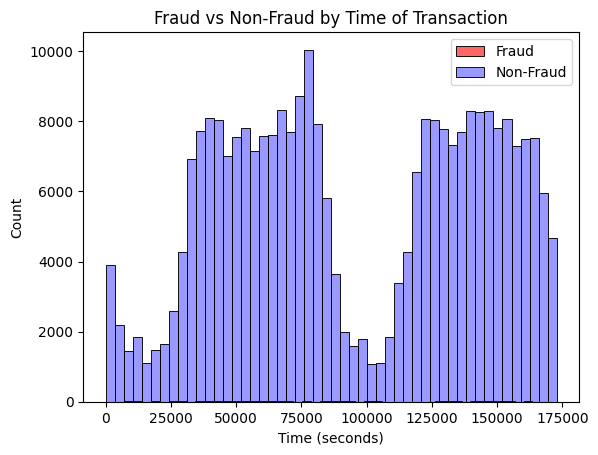

In [ ]:
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='red', label='Fraud', alpha=0.6)
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color='blue', label='Non-Fraud', alpha=0.4)
plt.legend()
plt.title("Fraud vs Non-Fraud by Time of Transaction")
plt.xlabel("Time (seconds)")
plt.show()
# found that frauds were clustered in certain time intervals. If that signal was strong, I could engineer a 'Time of Day' categorical feature

In [ ]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]>

**I began by exploring the Credit Card Fraud dataset from Kaggle, which is relevant to financial institutions like American Express. I found that the dataset is highly imbalanced (only 0.17% frauds). I validated this visually and numerically. Since the features V1 to V28 are already PCA-transformed, I focused on checking distribution patterns for Amount and Time. I used boxplots and histograms to identify whether frauds are systematically different from normal transactions. These insights will inform my feature scaling, model choice, and evaluation metrics later on**

## **FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a copy to avoid modifying original
df_scaled = df.copy()

scaler = StandardScaler()
df_scaled['Amount'] = scaler.fit_transform(df_scaled[['Amount']])
df_scaled['Time'] = scaler.fit_transform(df_scaled[['Time']])

# **Data Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


**Since it's an imbalanced dataset, use stratification to ensure the split keeps the same ratio of fraud/non-fraud....“I used stratify=y to maintain the class balance in both train and test sets. Otherwise, one of them could contain too few fraud samples to learn from or evaluate meaningfully.”**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


**Since the dataset had only 492 frauds out of ~285K samples, I used SMOTE to synthetically oversample fraud cases only on training data. This avoids leakage into test data and gives the model enough signal to learn fraud patterns**.

**Day 2 summary : After identifying the imbalance and scale inconsistencies, I scaled the Amount and Time columns using StandardScaler, leaving PCA components untouched. I then split the data into train and test sets with stratification to preserve class ratios. To deal with the heavy imbalance, I applied SMOTE on the training set to give fraud transactions more representation, allowing models to learn better.**

# **WITH SMOTE**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

print("Logistic Regression Evaluation:")
evaluate(lr, X_test, y_test)

print("\nDecision Tree Evaluation:")
evaluate(dt, X_test, y_test)


Logistic Regression Evaluation:
Confusion Matrix:
 [[56851    13]
 [   35    63]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9572835078037969

Decision Tree Evaluation:
Confusion Matrix:
 [[56840    24]
 [   25    73]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.8722379497662881


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


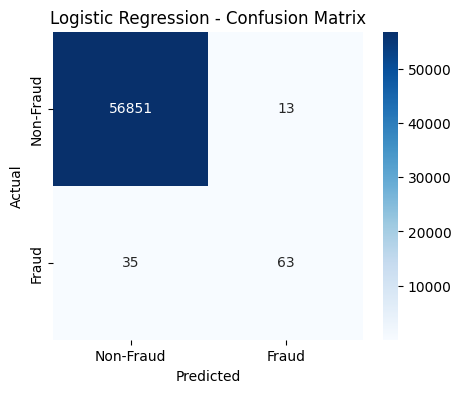

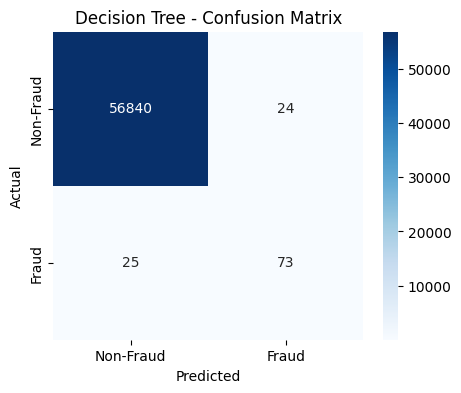

In [ ]:
# Logistic Regression
plot_conf_matrix(lr, X_test, y_test, title="Logistic Regression - Confusion Matrix")

# Decision Tree
plot_conf_matrix(dt, X_test, y_test, title="Decision Tree - Confusion Matrix")


Key Insights:
Logistic Regression has better discrimination ability (ROC AUC: 0.96)
But it’s more conservative — avoids false positives → higher precision, lower recall

Decision Tree is more aggressive (better recall, but slightly more false positives)
This is expected with tree-based models — they tend to overfit on oversampled data

SMOTE helped both models learn from fraud cases. Without SMOTE, recall would likely be much lower.



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(rf,
                           param_grid,
                           scoring='recall',
                           cv=3,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_



Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]  # For AUC, etc.

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Random Forest")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_test_prob))


Random Forest
Confusion Matrix:
 [[56845    19]
 [   17    81]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9732534051887496


# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [1, 10, 25, 50]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:50:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'scale_pos_weight': 50, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}


XGBoost Evaluation:
Confusion Matrix:
 [[56854    10]
 [   16    82]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9782935367450301


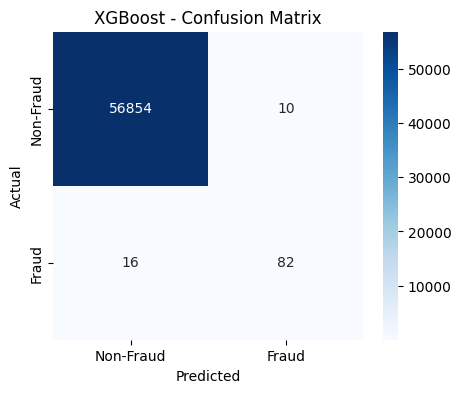

In [ ]:
print("XGBoost Evaluation:")
evaluate(random_search, X_test, y_test)
plot_conf_matrix(random_search, X_test, y_test, title="XGBoost - Confusion Matrix")
